In [2]:
#!pip install sklearn

In [1]:
#from sklearn.datasets import load_breast_cancer
#https://scikit-learn.org/stable/datasets.html
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from utils import *

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [3]:
data = pd.read_csv('HR_Analytics.csv')

In [4]:
data.shape

(1480, 38)

In [5]:
data.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [6]:
data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [7]:
columns_pre = len(data.columns)
data_clean = drop_columns_null_values_according_threshold(data, threshold = 0.9, verbose = False )
print(f'Columns dropped after null threshold (>=0.9): { columns_pre - len(data.columns) }')

columns_pre = len(data_clean.columns)
data_clean = get_rid_constant_features(data_clean, verbose = True)
print(f'Columns dropped after removing constant features: { columns_pre - len(data_clean.columns) }')

columns_pre = len(data_clean.columns)
data_clean = drop_duplicates_features(data_clean, verbose = False)
print(f'Columns dropped after removing duplicates features: { columns_pre - len(data_clean.columns) }')

print(f'\nColumns dropped after cleaning: { len(data.columns) - len(data_clean.columns) }')


Columns dropped after null threshold (>=0.9): 0
Columns constants dropped:
['EmployeeCount', 'Over18', 'StandardHours']
Columns dropped after removing constant features: 3
Columns dropped after removing duplicates features: 0

Columns dropped after cleaning: 3


In [8]:
data_clean.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,No,13,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,No,12,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,No,15,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,No,12,3,4,0,0,0,3,0,0,0,0.0


In [9]:
drop_cols = ['EmpID', 'Age']

In [10]:
data_clean.drop(drop_cols, axis=1, inplace=True)

In [11]:
categorical_columns = data_clean.drop('Attrition', axis=1).select_dtypes(include=['object']).columns.to_list()
numerical_columns = data_clean.drop('Attrition', axis=1).select_dtypes(exclude=['object']).columns.to_list()

In [12]:
data_no_categ = data_clean.drop(categorical_columns, axis=1)

In [13]:
data_no_categ.head()

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,230,3,3,405,3,54,3,1,3,1420,25233,1,13,3,3,0,0,2,3,0,0,0,0.0
1,No,812,10,3,411,4,69,2,1,3,1200,9724,1,12,3,1,0,0,2,3,0,0,0,0.0
2,Yes,1306,5,3,614,2,69,3,1,2,1878,8059,1,14,3,4,0,0,3,3,0,0,0,0.0
3,No,287,5,2,1012,2,73,3,1,4,1051,13493,1,15,3,4,0,0,2,3,0,0,0,0.0
4,Yes,247,8,1,1156,3,80,3,1,3,1904,13556,1,12,3,4,0,0,0,3,0,0,0,0.0


# REGRESIÓN LOGÍSTICA

Los modelos lineales también se utilizan ampliamente para la clasificación. Primero veamos la clasificación binaria. En este caso, se realiza una predicción utilizando la siguiente fórmula:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

<br><br>
¿Qué es lo que va a intentar aprender el modelo? Los distintos pesos de Ws para clasificar mejor a nuestra variable target.


<br><br>
Existen muchos algoritmos para aprender modelos lineales. Estos algoritmos difieren en las siguientes dos formas:

* La forma en que miden qué tan bien se ajusta una combinación particular de coeficientes e intersección a los datos de entrenamiento.
* Si y qué tipo de regularización utilizan.

Los dos algoritmos de clasificación lineal más comunes son la **regresión logística**, implementada en linear_model.LogisticRegression, y las **Support Vector Machines** (linear SVMs), implementadas en svm.LinearSVC

### Imagen X_TRAIN, X_TEST, y_train, y_test

![1_train-test-split_0.jpg](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

In [14]:
from sklearn.model_selection import train_test_split

In [36]:
#data_no_categ.YearsWithCurrManager = data_no_categ.YearsWithCurrManager.apply(lambda x: 0 if np.isnan(x) else x)

In [37]:
X = data_no_categ.drop('Attrition', axis=1)
y = data_no_categ.Attrition

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data_no_categ.Attrition, random_state=42)

In [39]:
print("X shape: {}".format(X.shape))
print("---> X_train shape: {}".format(X_train.shape))
print("---> X_test shape: {}".format(X_test.shape))
print('')
print("y shape: {}".format(y.shape))
print("---> y_train shape: {}".format(y_train.shape))
print("---> y_test shape: {}".format(y_test.shape))

X shape: (1480, 23)
---> X_train shape: (1110, 23)
---> X_test shape: (370, 23)

y shape: (1480,)
---> y_train shape: (1110,)
---> y_test shape: (370,)


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression().fit(X_train, y_train)


In [43]:
#X_train.iloc[0]

In [44]:
logreg.coef_

array([[-2.68327034e-04,  2.03327746e-02, -1.02870952e-02,
        -1.32821731e-04, -5.69781775e-02,  1.25526703e-03,
        -4.84460410e-02, -5.84850924e-03, -5.61455016e-02,
        -3.13949375e-06,  4.52183685e-05,  4.65904034e-02,
        -3.89053858e-02, -4.77426045e-03, -2.85970814e-02,
        -5.90687886e-02, -5.27622792e-02, -5.03171381e-02,
        -2.75831171e-02, -2.94813560e-02, -8.14071222e-02,
         1.02834549e-01, -8.47354296e-02]])

In [45]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.841
Test set score: 0.843


 <p>            </p>

Buenísimos resultados, peeero... al estar tan cerca los valores de Train y Test, es muy probable que el modelo este **UNDERFITEANDO**

<br><br>

¿Qué quiere decir UNDERFITTING? <br>
Si nuestro modelo es demasiado simple, por ejemplo, "Todos los que tienen una casa compran un barco", es posible que no puedas capturar todos los aspectos y la variabilidad de los datos

<br><br>
¿Qué quiere decir OVERFITTING? <br>
Ocurre cuando ajustamos demasiado un modelo a las particularidades del conjunto de entrenamiento y obtenemos un modelo que funciona bien en el conjunto de entrenamiento, pero no puede generalizar a nuevos datos.

<br><br><br><br>
![sweet_spot_under_over.png](https://cdn-images-1.medium.com/max/550/0*cJtnUOH6HciVcCAL)

# ¿Qué podemos hacer al respecto entonces?

## Regularizar o penalizar al modelo

* Ridge
* Lasso
* Parámetros regularizadores del modelo

https://medium.com/@rithpansanga/logistic-regression-and-regularization-avoiding-overfitting-and-improving-generalization-e9afdcddd09d

# Decision Trees

## Recapitulando...

* Controlar la complejidad de los árboles de decisión es importante.
* Construir un árbol hasta que todas las hojas sean puras puede llevar a modelos muy complejos y sobreajustados a los datos de entrenamiento.
* El sobreajuste se puede observar en la Figura 2-26, donde las regiones predichas como clase 1 están en medio de los puntos de clase 0 y hay una pequeña franja predicha como clase 0 alrededor de un punto de clase 0 a la derecha.
<br><br>
Para prevenir el sobreajuste, se pueden utilizar dos estrategias comunes: <br>
* detener la creación del árbol tempranamente (llamado pre-poda, *pre-tunning*);
* construir el árbol y luego eliminar o reducir nodos que contengan poca información (llamado post-poda o simplemente poda, *post-tuning*).

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.773


¿Qué les llama la atención de estos resultados?

In [57]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 501.3 kB/s eta 0:00:00 0:00:01
DEPRECATION: cli-code-quality 1.0.2 has a non-standard dependency specifier furycli!=2.2.3-test,>=2.2.3. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of cli-code-quality or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


array(['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_no_categ.dot", class_names=["yes", "no"],
 feature_names=tree.feature_names_in_, impurity=False, filled=True)

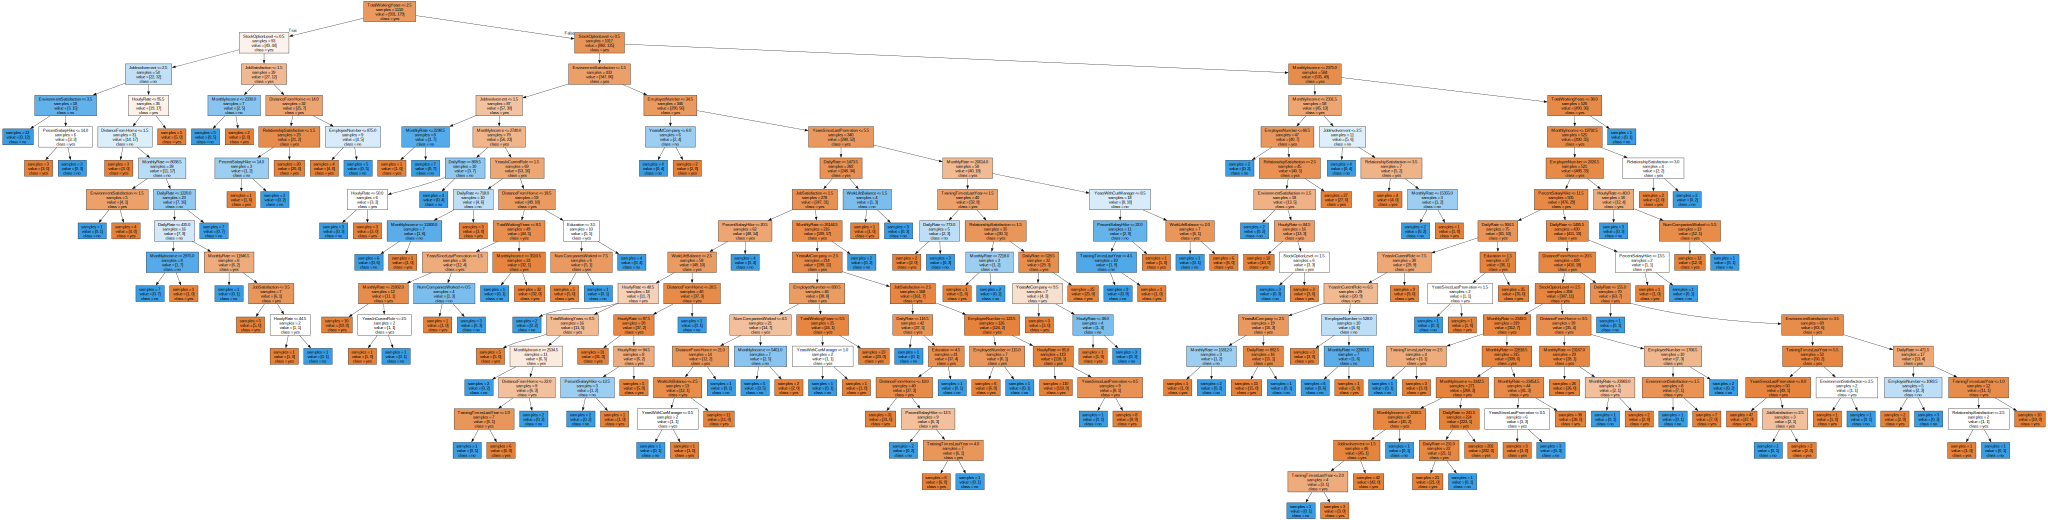

In [64]:
import graphviz
with open("tree_no_categ.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

In [65]:
tree2 = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.867
Accuracy on test set: 0.832


### Feature importance

<br> Si tuviéramos que decir cuál es la(s) variable(s) más importantes... ¿cuál dirían que es?

In [66]:
import numpy as np

Es medio complejo darse cuenta desde el árbol directamente cuánto impacta cada variable en el resultado final, y es por eso que necesitamos otra alternativa: **FEATURE IMPORTANCE**

In [67]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.09447622 0.05412765 0.01981158 0.07854922 0.04777426 0.06149817
 0.03708782 0.         0.02539006 0.0840443  0.07778761 0.02684411
 0.05517012 0.         0.03433565 0.04553071 0.08280306 0.03922034
 0.0216693  0.02565263 0.02682183 0.04175005 0.01965533]


In [68]:
X_train.shape[1]

23

In [69]:
tree.feature_names_in_

array(['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [70]:
import matplotlib.pyplot as plt

In [73]:
feat_importance1 = pd.DataFrame(columns=['feature_name', 'feature_importance'])

In [75]:
feat_importance1['feature_name'] = tree.feature_names_in_
feat_importance1['feature_importance'] = tree.feature_importances_

In [79]:
feat_importance1['feature_importance_std'] = feat_importance1.feature_importance/feat_importance1.feature_importance.sum()*100

In [84]:
feat_importance1 = feat_importance1.sort_values(by='feature_importance_std')

In [87]:
feat_importance1.head()

,feature_name,feature_importance,feature_importance_std
7,JobLevel,0.000000,0.000000
13,PerformanceRating,0.000000,0.000000
22,YearsWithCurrManager,0.019655,1.965533
2,Education,0.019812,1.981158
18,WorkLifeBalance,0.021669,2.166930


<BarContainer object of 23 artists>

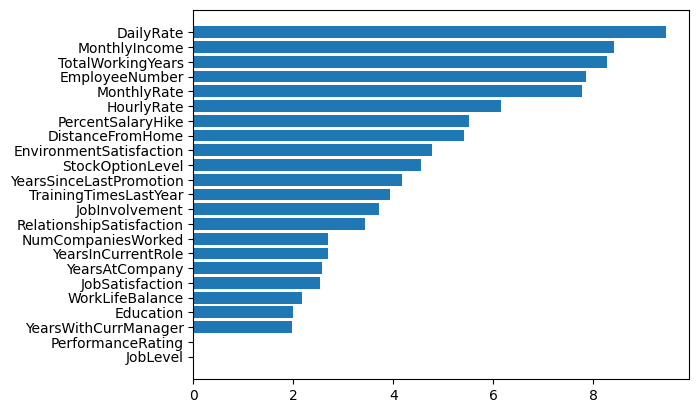

In [86]:
plt.barh(feat_importance1.feature_name, width=feat_importance1.feature_importance_std, align='center')

## Resumen de Árboles (simples... )
<br>

### Ventajas

* Los parámetros de pre-poda controlan la complejidad del modelo en los árboles de decisión.
* Se pueden utilizar diferentes estrategias de pre-poda, como establecer max_depth, max_leaf_nodes o min_samples_leaf, para prevenir el sobreajuste.
* Los árboles de decisión tienen ventajas, como la facilidad de visualización y comprensión del modelo resultante, especialmente en árboles más pequeños.
* Los algoritmos de árboles de decisión son completamente invariantes a la escala de los datos, por lo que no se requiere preprocesamiento como normalización o estandarización de características.
* Los árboles de decisión funcionan bien con características que están en escalas completamente diferentes o una combinación de características binarias y continuas.
<br>

### Desventajas
* La principal desventaja de los árboles de decisión es que tienden a sobreajustar y proporcionar un rendimiento deficiente en generalización, incluso con el uso de pre-poda.
* En la mayoría de las aplicaciones, se utilizan métodos de conjunto (ensemble methods) en lugar de un solo árbol de decisión para mejorar el rendimiento.